In [10]:
import matplotlib.pyplot as plt

In [1]:
from allennlp.predictors.predictor import Predictor
predictor2 = Predictor.from_path("../pretrained_weights/openie-model.2020.03.26.tar.gz")

In [2]:
test_sentence = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

In [111]:
all([[], []])

False

In [3]:
result=predictor2.predict(sentence=test_sentence)

In [4]:
result

{'verbs': [{'verb': 'introduce',
   'description': '[ARG0: We] [V: introduce] [ARG1: a new language representation model called BERT , which stands for Bidirectional Encoder Representations from Transformers . Unlike recent language representation models] , BERT is designed to pre - train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers . As a result , the pre - trained BERT model can be fine - tuned with just one additional output layer to create state - of - the - art models for a wide range of tasks , such as question answering and language inference , without substantial task - specific architecture modifications . BERT is conceptually simple and empirically powerful . It obtains new state - of - the - art results on eleven natural language processing tasks , including pushing the GLUE score to 80.5 % ( 7.7 % point absolute improvement ) , MultiNLI accuracy to 86.7 % ( 4.6 % absolute improvement ) , SQuAD v1

In [17]:
import re
def get_ARGS():
    ARGS_overall=[]
    
    for item in result['verbs']:
        to_parse=item['description']
        ARGS=re.findall('\[.*?\]', to_parse)
        ARGS_overall.append(ARGS)

    return ARGS_overall

ARGS=get_ARGS()

In [18]:
from collections import defaultdict
def get_svo_triplets():
  svo_triplets=[]
  for triplet in ARGS:
    svo=defaultdict(list)
    for arg in triplet:
      parts=arg.split(':')
      if 'ARG0' in parts[0]:
        svo['subject']=parts[1][:-1]
      elif 'ARG1' in parts[0]:
        svo['object']=parts[1][:-1]
      elif 'V' in parts[0]:
        svo['relation'].append(parts[1][:-1])
    
    svo['relation']=' '.join(svo['relation'])
    svo_triplets.append(svo)
  return svo_triplets

svo_triplets=get_svo_triplets()

In [104]:
svo_triplets

[defaultdict(list,
             {'subject': ' We',
              'relation': ' introduce',
              'object': ' a new language representation model called BERT , which stands for Bidirectional Encoder Representations from Transformers . Unlike recent language representation models'}),
 defaultdict(list,
             {'object': ' a new language representation model',
              'relation': ' called'}),
 defaultdict(list, {'object': ' which', 'relation': ' stands'}),
 defaultdict(list, {'object': ' BERT', 'relation': ' designed  As a result'}),
 defaultdict(list,
             {'subject': ' BERT',
              'relation': ' pre',
              'object': ' train deep bidirectional representations from unlabeled text'}),
 defaultdict(list, {'relation': ''}),
 defaultdict(list, {'relation': ' train', 'object': ' representations'}),
 defaultdict(list, {'relation': ' conditioning', 'object': ' on both left'}),
 defaultdict(list, {'relation': ' can'}),
 defaultdict(list, {'relation': '

In [19]:
import pandas as pd
df=pd.DataFrame(svo_triplets)
df.dropna(inplace=True)
df.head()

,subject,relation,object
0,We,introduce,a new language representation model called BE...
4,BERT,pre,train deep bidirectional representations from...
10,the pre - trained BERT model,create,state - of - the - art models for a wide rang...
11,It,obtains,new state - of - the - art results on eleven ...
14,SQuAD v1.1 question,answering,Test


In [106]:
from pyvis.network import Network
net = Network(height=1500, width=1500)

In [107]:
def build_graph(df, net):
    for row in df.iterrows():
        row = row[1]
        net.add_node(row['subject'])
        net.add_node(row['object'])    
        net.add_edge(row['subject'], row['object'], label=row['relation'])
    
    return net

In [108]:
build_graph(df, net)

<class 'pyvis.network.Network'> |N|=10 |E|=5

In [109]:
net.show('temp.html')

In [102]:
net.get_nodes()

[]

In [82]:
def build_graph(row):
    net.add_node(row['subject'], )
    net.add_node(row['object'])    
    net.add_edge(row['subject'], row['object'], label=row['relation'])

In [83]:
df.apply(build_graph,axis=1);

In [105]:
net.show('temp.html')

In [67]:
for row in df.iterrows():
    series = 
    print(row[1]['subject'])

 We
 BERT
 the pre - trained BERT model
 It
 SQuAD v1.1 question


In [57]:
net.add_node('a')
net.add_node('b')
net.add_node('c')

In [58]:
net.add_edge('a', 'b', label='atob')
net.add_edge('a', 'c', label='atoc')

In [60]:
net.show('temp.html')

In [48]:
G = nx.from_pandas_edgelist(df, 'subject', 'object')

In [51]:
G.add_edge('SQuAD v1.1 question', 'Test',label='dsd')

In [52]:
net.from_nx(G)

In [53]:
net.show('temp.html', )

In [ ]:
net.add_edge()

In [23]:
nx.Graph(df)

NetworkXError: Input is not a correct Pandas DataFrame edge-list.

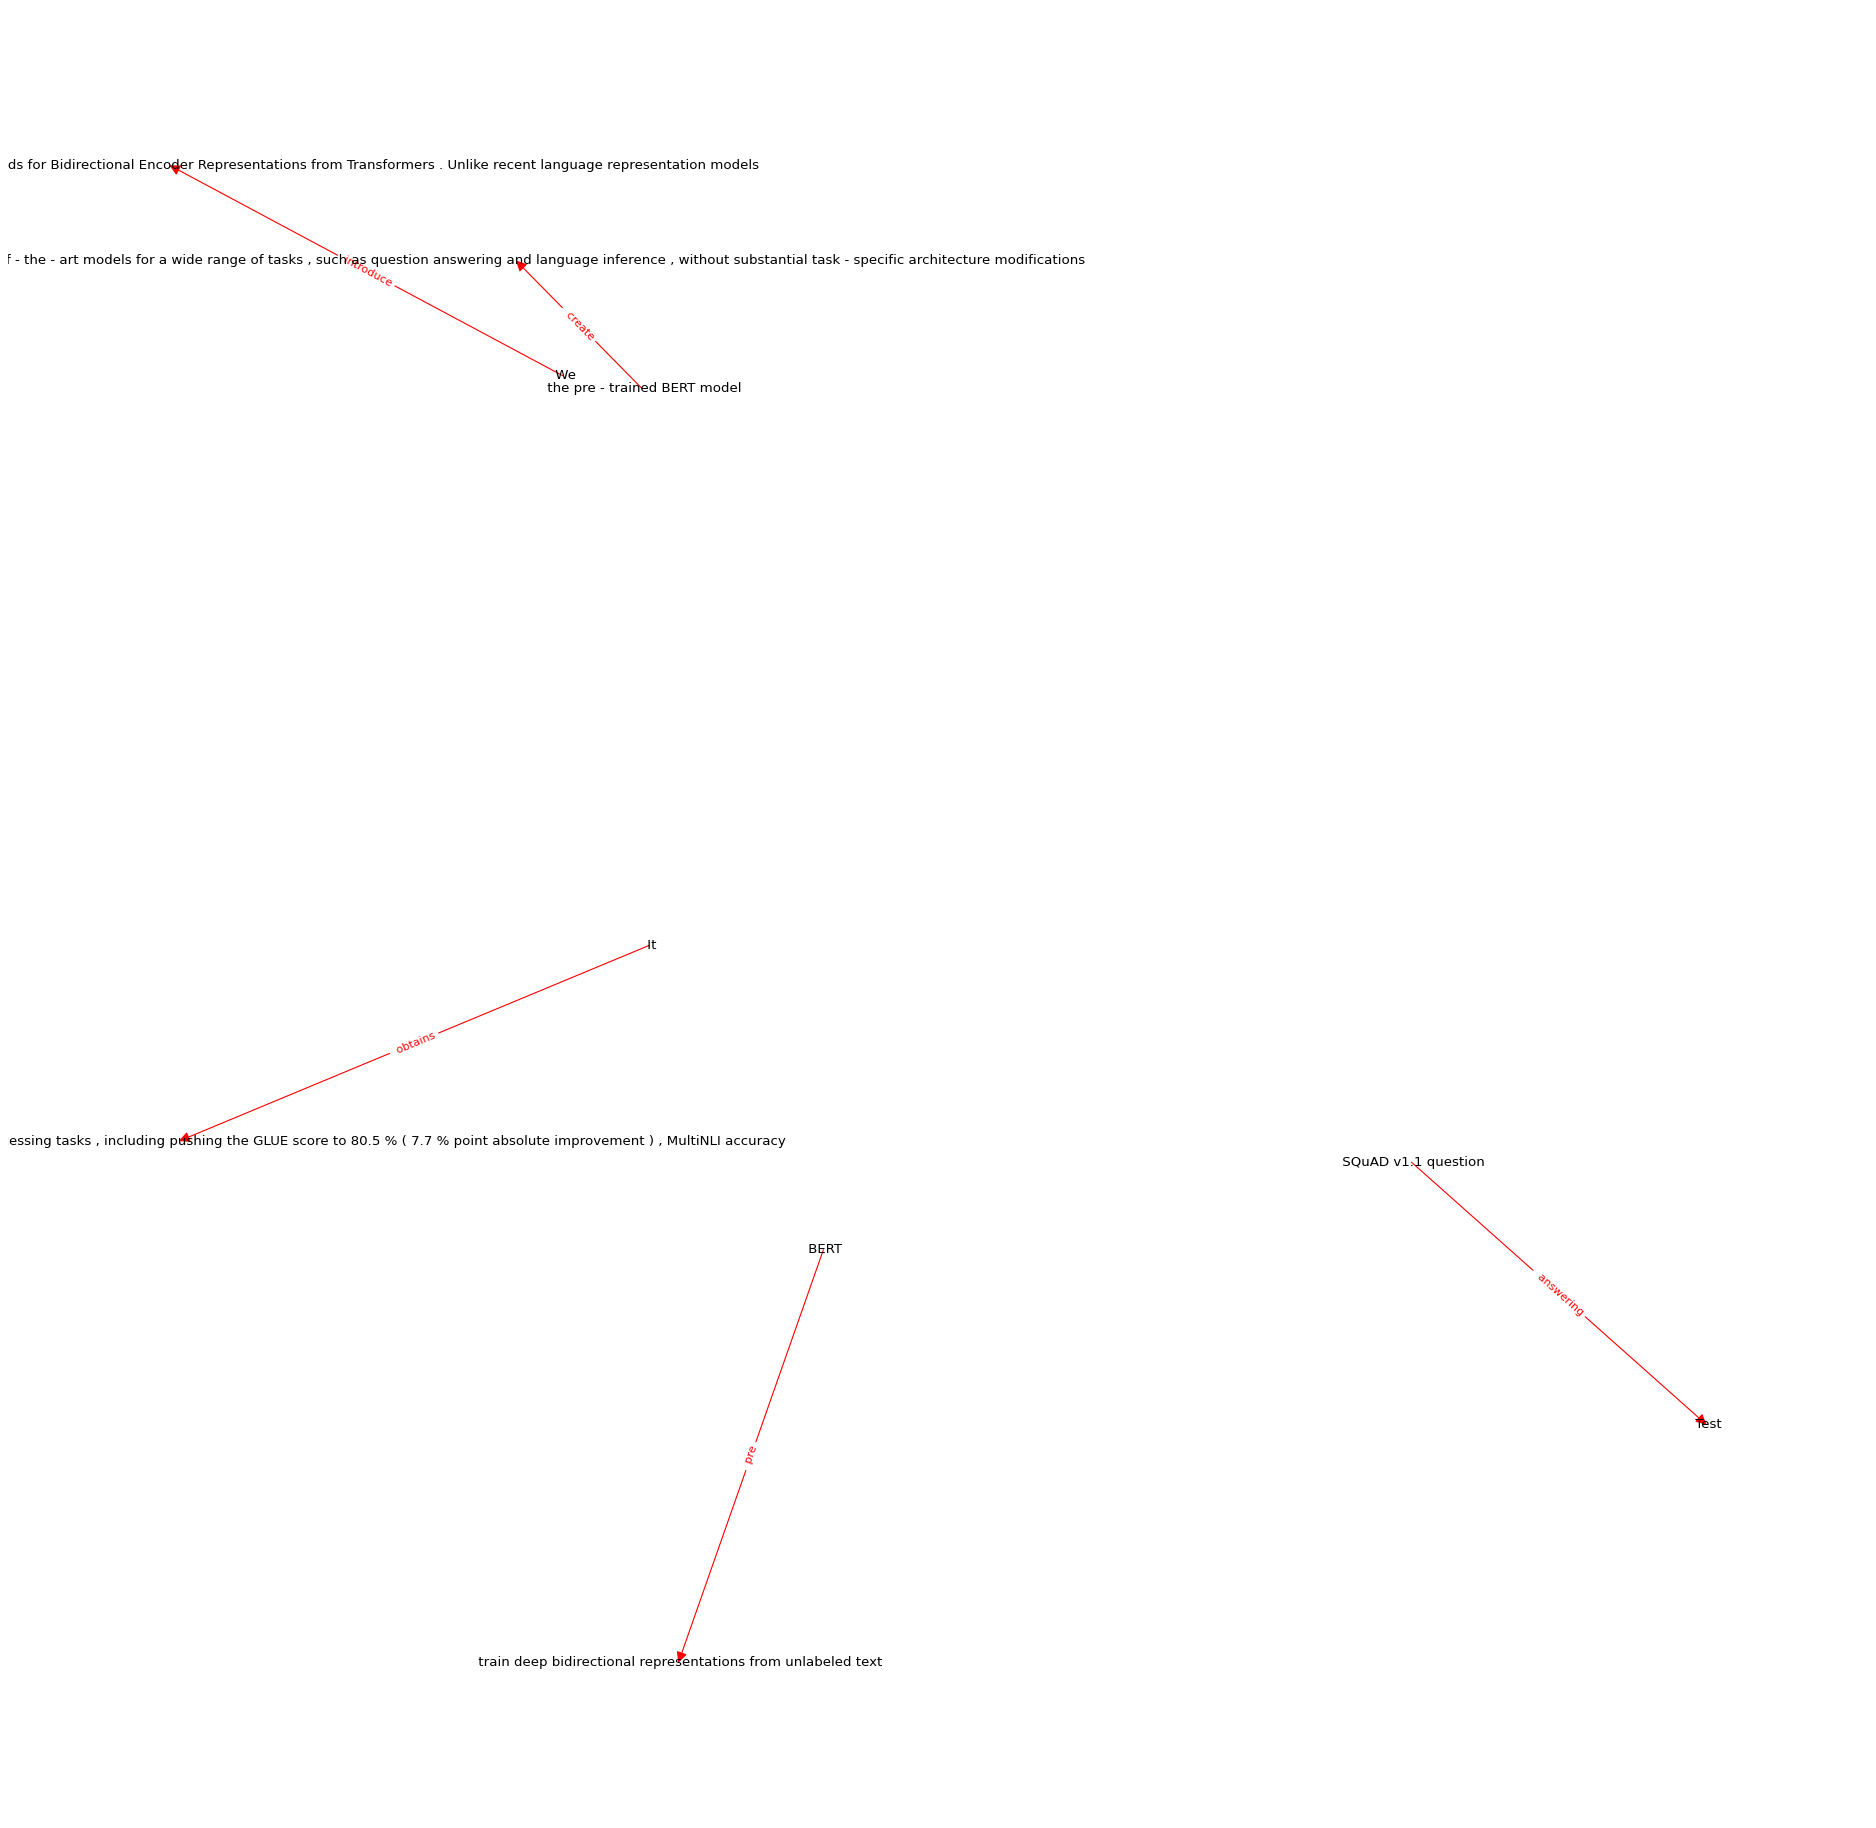

In [11]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.1, iterations=20)
    plt.figure(num=None, figsize=(30, 30), dpi=80)
    nx.draw_networkx(
        k_graph,
        #node_size=[int(deg[1]) * 500 for deg in node_deg],
        node_size=[0 for deg in node_deg],

        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

draw_kg(df)